In [1]:
import numpy as np
from matplotlib import pyplot as plt

### ignore the cell:

In [4]:
h = 0.01
n_max = 200

# t_values = [i*h for i in range(1, n_max+1)]

y = 1
t_values = [0]
y_values = [y]

for i in range(1, n_max+1):
    f = -y
    y = y + (f*h)
    
    t_values += [i*h]
    y_values += [y]
#end-for

In [3]:
# A = torch.tensor([
#     [1, 1, 0, 0],
#     [0, 0, 1, -1],
#     [1, 0, 1, 0],
#     [0.0, 1, 0, -1],
# ], dtype=torch.float)
# b = torch.tensor([[9.0, 1, 8, 2]], dtype=torch.float)
# # x = torch.linalg.solve(A, b)
# # print(x)

# A = torch.randn(4, 4)
# A = torch.tensor([
#     [1, 1, 0, 0],
#     [0, 0, 1, -1],
#     [1, 0, 1, 0],
#     [0.0, 1, 0, -1],
# ], dtype=torch.float)

# # b = torch.randn(4)
# b = torch.tensor([9, 1, 8, 2], dtype=torch.float)

# x = torch.linalg.solve(A, b)

# print(A)
# print(b)
# print(x)

In [5]:
# t_test = np.linspace(start=0, stop=n_max*h, num=n_max)
# t_test
y_test = 1.*np.exp(-np.array(t_values))

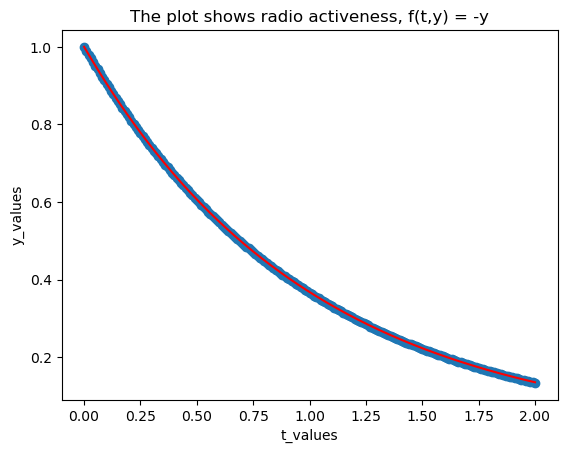

In [6]:
plt.scatter(t_values, y_values)
plt.plot(t_values, y_test, color='red')
plt.xlabel('t_values')
plt.ylabel('y_values')
plt.title('The plot shows radio activeness, f(t,y) = -y')
plt.show()

In [7]:
def eulerODE(args):
    # f code
    None
#end-def

In [8]:
def eulerODE(t0, y0):
    return fun(t0, y0)
#end-def

def fun(t, y):
    return -y
#end-def

t0 = 0
y0 = 1

value = eulerODE(t0, y0)
value

-1

In [9]:
from scipy.integrate import solve_ivp

In [10]:
def exponential_decay(t, y):
    return -0.5 * y
#end-def

In [11]:
sol = solve_ivp(fun=exponential_decay, t_span=[0, 10], y0=[0, 2, 4, 6, 8, 10])

In [12]:
print(sol.t)

[ 0.          0.11698871  1.28687581  3.11546345  4.90122642  6.6899179
  8.47898072 10.        ]


In [13]:
print(sol.y)
print(sol.y.shape)

[[ 0.          0.          0.          0.          0.          0.
   0.          0.        ]
 [ 2.          1.88636713  1.05099467  0.42150856  0.17269019  0.07064734
   0.0288964   0.01350931]
 [ 4.          3.77273426  2.10198934  0.84301713  0.34538039  0.14129468
   0.05779279  0.02701862]
 [ 6.          5.65910139  3.15298401  1.26452569  0.51807058  0.21194202
   0.08668919  0.04052794]
 [ 8.          7.54546852  4.20397868  1.68603426  0.69076077  0.28258936
   0.11558559  0.05403725]
 [10.          9.43183565  5.25497335  2.10754282  0.86345096  0.35323671
   0.14448198  0.06754656]]
(6, 8)


In [14]:
def equation(x):
    return (x**4.0) - (2.0*x) + 1.0
#end-def

# equation(3)

N = 100
a = 0.0
b = 2.0
h = (b-a)/N

s = (0.5*equation(a)) + (0.5*equation(b))
# print(s)

for k in range(1, N):
    s += equation(a+(k*h))
#end-for

print(s*h)

4.401066656


### Bergers' PDEs:

In [42]:
import torch
import numpy as np
from matplotlib import pyplot as plt

In [43]:
class NN(nn.Module):
    def __init__(self,):
        super(NN, self,).__init__()
        self.network = nn.Sequential(
            nn.Linear(in_features=2, out_features=20, bias=True),
            nn.Tanh(),
            
            nn.Linear(in_features=20, out_features=30, bias=True),
            nn.Tanh(),
            
            nn.Linear(in_features=30, out_features=30, bias=True),
            nn.Tanh(),
            
            nn.Linear(in_features=30, out_features=20, bias=True),
            nn.Tanh(),
            
            nn.Linear(in_features=20, out_features=20, bias=True),
            nn.Tanh(),
            
            nn.Linear(in_features=20, out_features=1, bias=True),
        )
    #end-def
    def forward(self, x):
        return self.network(x)
    #end-def
#end-class

model = NN()
print(model)

NN(
  (network): Sequential(
    (0): Linear(in_features=2, out_features=20, bias=True)
    (1): Tanh()
    (2): Linear(in_features=20, out_features=30, bias=True)
    (3): Tanh()
    (4): Linear(in_features=30, out_features=30, bias=True)
    (5): Tanh()
    (6): Linear(in_features=30, out_features=20, bias=True)
    (7): Tanh()
    (8): Linear(in_features=20, out_features=20, bias=True)
    (9): Tanh()
    (10): Linear(in_features=20, out_features=1, bias=True)
  )
)


In [44]:
# model = NN()
# print(model)

# h = 0.1
# x = torch.arange(start=-1, end=1+h, step=h)
# t = torch.arange(start= 0, end=1+h, step=h)
        
# X = torch.cartesian_prod(x, t)

# y_pred = model(X)
# print(y_pred.squeeze())

In [45]:
# # bc1 = torch.tensor([0, 0, 0])
# ic  = torch.tensor([1, 2, 3]).reshape(-1,1)
# # bc2 = torch.tensor([0, 0, 0])

# # # y_train = torch.hstack((bc1, ic, bc2)).reshape(-1,1)
# # # print(y_train)

# # torch.cat([bc1, bc2, ic]).unsqueeze(1)

# # v = torch.full(size=(3, 1), fill_value=0.01/np.pi)
# v = torch.full(size=ic.shape, fill_value=0.01/np.pi)

# print(v)
# print(ic.shape)

# print(v*ic)

In [46]:
# v = torch.tensor([
#     [0, 0, 0],
#     [0, 0, 0],
#     [0, 0, 0],
#     [0, 0, 0],
#     [0, 0, 0],
#     [0, 0, 0],
# ])

# print(len(v)) # It returns m (i.e., number of elements or samples).
# print(v.shape)
# print(f'm = {v.shape[0]}')
# print(f'n = {v.shape[1]}')

# y = torch.zeros(size=(len(v), 1))
# print(y)

In [47]:
class MyPINN:
    def __init__(self,):
        # device = torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')
        
        self.model = NN()
        
        # compute domain:
        self.h = 0.1
        self.k = 0.1
        
        x = torch.arange(start=-1, end=1+self.h, step=self.h)
        t = torch.arange(start= 0, end=1+self.k, step=self.k)
        
        self.X = torch.cartesian_prod(x, t)
        
        # training data:
        bc1 = torch.cartesian_prod(torch.unsqueeze(x[0],  dim=0), t)
        bc2 = torch.cartesian_prod(torch.unsqueeze(x[-1], dim=0), t)
        ic = torch.cartesian_prod(x, torch.unsqueeze(t[0], dim=0))
        # Process: tensor(-1) --> tensor([-1]) torch.unsqueeze(x[0], dim=0) # row-wise
        # ref: https://pytorch.org/docs/stable/generated/torch.unsqueeze.html
        
        self.X_train = torch.vstack((bc1, ic, bc2))
        # self.X_train.requires_grad = True
        
        y_bc1 = torch.zeros(size=(len(bc1),)) # [0...0]
        y_bc2 = torch.zeros(size=(len(bc2),)) # [0...0]
        
        y_ic  = -torch.sin(torch.tensor(np.pi)*ic[:,0])
        # [-sin(π x -1.0), -sin(π x -0.9), ..., -sin(π x 0), ..., -sin(π x 0.9), -sin(π x 1.0)]
        
        y_train = torch.hstack((y_bc1, y_ic, y_bc2)) # [0...0, sin(π x x), 0...0]
        self.y_train = y_train.reshape(-1,1) # [[0], [0], [0], [1], [2], [3] [0], [0], [0]
        
        self.X.requires_grad = True
        
        # optimizer setting:
        self.adam = torch.optim.Adam(params=self.model.parameters())
        
        # L-BFGS is a second-order optimization algorithm.
        # https://machinelearningmastery.com/bfgs-optimization-in-python/
        self.optimizer = torch.optim.LBFGS(
            params=self.model.parameters(),
            lr=1.0,
            max_iter=1010,
            max_eval=1000,
            history_size=100,
            tolerance_grad = 1e-7,
            tolerance_change = 1.0 * np.finfo(float).eps,
            line_search_fn='strong_wolfe'
        )
        
        self.criterion = torch.nn.MSELoss()
        self.iter = 1
    #end-def
    
    def gradient(self, outputs, inputs):
        return torch.autograd.grad(outputs=outputs,
                                   inputs=inputs,
                                   grad_outputs=torch.ones_like(outputs),
                                   create_graph=True,
                                   retain_graph=True,
        )
    #end-def
    
    def loss_function(self,):
        self.adam.zero_grad()
        self.optimizer.zero_grad()
        
        y_pred = self.model(self.X_train)
        loss_data = self.criterion(y_pred, self.y_train)
        
        u = self.model(self.X)
        
        du_dX = self.gradient(outputs=u, inputs=self.X)[0]
        
        du_dx = du_dX[:,0]
        du_dt = du_dX[:,1]
        
        du_dXX = self.gradient(outputs=du_dX, inputs=self.X)[0]
        
        du_dxx = du_dXX[:,0]
        
        loss_pde = self.criterion(du_dt + (u.squeeze()*du_dx), (0.01/np.pi)*du_dxx)
        
        loss = loss_data + loss_pde
        loss.backward()
        
        if self.iter % 100 == 0:
            print(f'iteration: {self.iter}, loss: {loss.item():0.6f}')
        #end-if
        self.iter += 1
        
        return loss
    #end-def
    
    def train(self,):
        self.model.train()
        for i in range(500):
            self.adam.step(self.loss_function)
        # end-for
        # self.adam.step(self.loss_function)
        print('end: Adam')
        self.optimizer.step(self.loss_function)
        print('end: L-BFGS')
        
        return self.model(self.X)
    #end-def
    
    def evaluation(self,):
        self.model.eval()
    #end-def
#end-class

In [48]:
# help(torch.optim.Adam)

In [49]:
network = MyPINN()
y_pred_small = network.train()

iteration: 100, loss: 0.145399
iteration: 200, loss: 0.085057
iteration: 300, loss: 0.062518
iteration: 400, loss: 0.033245
iteration: 500, loss: 0.032917
end: Adam
iteration: 600, loss: 0.007410
iteration: 700, loss: 0.002765
iteration: 800, loss: 0.001237
iteration: 900, loss: 0.000678
iteration: 1000, loss: 0.000411
iteration: 1100, loss: 0.000262
iteration: 1200, loss: 0.000191
iteration: 1300, loss: 0.000160
iteration: 1400, loss: 0.000121
iteration: 1500, loss: 0.000099
end: L-BFGS


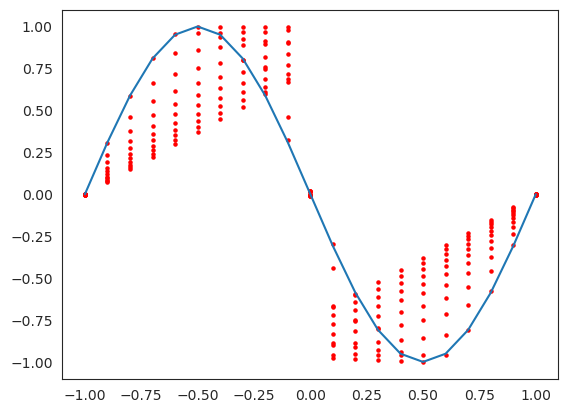

In [50]:
# # print(y_pred_small.shape)
yp = y_pred_small.squeeze()
# # x = torch.arange(start=-1, end=1+0.1, step=0.1)
# # x = x.squeeze()

h = 0.1
x = torch.arange(start=-1, end=1+h, step=h)
t = torch.arange(start= 0, end=1+h, step=h)
X = torch.cartesian_prod(x, t)

# print(x)
# x = X[:,0]
plt.plot(X[:,0], -torch.sin(np.pi*X[:,0]))
plt.scatter(X[:,0], yp.detach(), s=5, color='r')
plt.show()

# # plt.plot(X[:,0], yp.detach())
# # # yp.detach())

In [51]:
# v = torch.tensor([
#     [1],
#     [2],
#     [3],
#     [4],
#     [5],
#     [6],
# ])

# print(v.reshape(3, 2))
# print(v.reshape(2, 3))

In [52]:
# X

In [53]:
# yp[:,6] # t=0.5s

# plt.plot(X[:,0], -torch.sin(np.pi*X[:,0]))
# for i in range(1, 11):
#     plt.plot(yp[:,i].detach())
# plt.show()

# plt.plot(yp[:,6].detach())
# plt.plot(yp[:,6].detach())
# plt.show()

In [54]:
# ### EXACT solution:
# # torch.cartesian_prod(x, torch.tensor([0.5]))
# h = 0.1
# x = torch.arange(start=-1, end=1+h, step=h)
# t = torch.arange(start= 0, end=1+h, step=h)

# X = torch.cartesian_prod(x, t)
# # print(X)

# y_original = -torch.sin(torch.tensor(np.pi)*X[:,0])
# y_original = y_original.reshape(len(x), len(t))
# print(y_original.shape)

In [55]:
# yp = yp.reshape(len(x), len(t))
# print(yp.shape)

# i = 0
# plt.plot(y_original[:,i])
# plt.plot(yp[:,i].detach())
# plt.show()

In [56]:
# help(network)
# network.__dict__
# network.model.eval()

network.model.__dict__

{'training': True,
 '_parameters': OrderedDict(),
 '_buffers': OrderedDict(),
 '_non_persistent_buffers_set': set(),
 '_backward_pre_hooks': OrderedDict(),
 '_backward_hooks': OrderedDict(),
 '_is_full_backward_hook': None,
 '_forward_hooks': OrderedDict(),
 '_forward_hooks_with_kwargs': OrderedDict(),
 '_forward_pre_hooks': OrderedDict(),
 '_forward_pre_hooks_with_kwargs': OrderedDict(),
 '_state_dict_hooks': OrderedDict(),
 '_state_dict_pre_hooks': OrderedDict(),
 '_load_state_dict_pre_hooks': OrderedDict(),
 '_load_state_dict_post_hooks': OrderedDict(),
 '_modules': OrderedDict([('network',
               Sequential(
                 (0): Linear(in_features=2, out_features=20, bias=True)
                 (1): Tanh()
                 (2): Linear(in_features=20, out_features=30, bias=True)
                 (3): Tanh()
                 (4): Linear(in_features=30, out_features=30, bias=True)
                 (5): Tanh()
                 (6): Linear(in_features=30, out_features=20, bias=

In [57]:
h = 0.01
k = 0.01
        
x = torch.arange(start=-1, end=1, step=h)
t = torch.arange(start= 0, end=1, step=k)
        
X = torch.cartesian_prod(x, t)
print(X.shape)

print(x.shape)
print(t.shape)
len(x)

torch.Size([20000, 2])
torch.Size([200])
torch.Size([100])


200

In [58]:
model = network.model
model.eval()

with torch.no_grad():
    y_pred = model(X)
    print(y_pred.shape)
    y_pred = y_pred.reshape(len(x), len(t))
    print(y_pred.shape)
#end-with

print(y_pred)
print(y_pred.shape)

torch.Size([20000, 1])
torch.Size([200, 100])
tensor([[ 0.0038,  0.0034,  0.0030,  ..., -0.0019, -0.0018, -0.0018],
        [ 0.0346,  0.0333,  0.0321,  ...,  0.0059,  0.0059,  0.0059],
        [ 0.0654,  0.0632,  0.0611,  ...,  0.0137,  0.0137,  0.0136],
        ...,
        [-0.0942, -0.0915, -0.0890,  ..., -0.0242, -0.0240, -0.0238],
        [-0.0628, -0.0610, -0.0594,  ..., -0.0164, -0.0162, -0.0161],
        [-0.0311, -0.0302, -0.0295,  ..., -0.0085, -0.0084, -0.0084]])
torch.Size([200, 100])


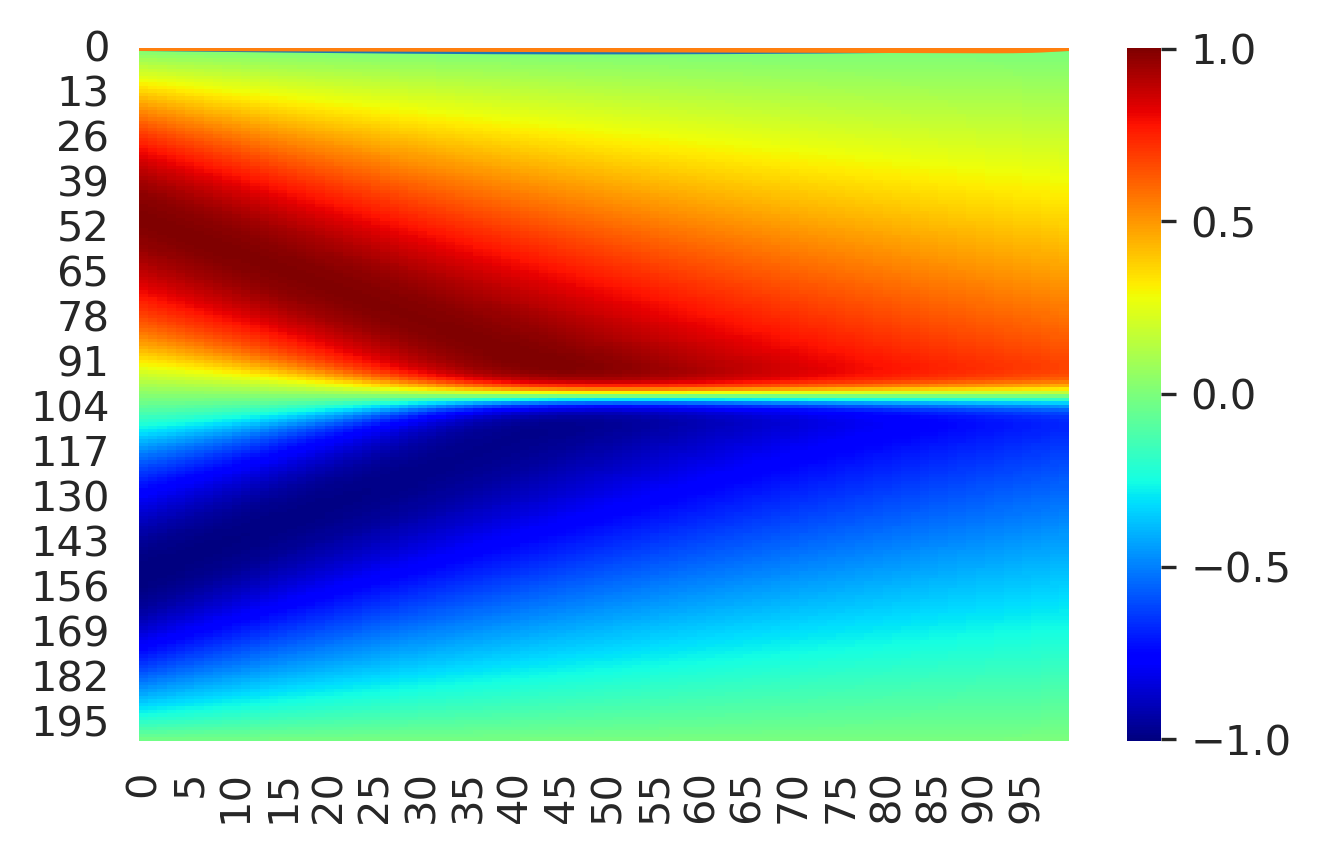

In [59]:
import seaborn as sns
sns.set_style("white")
plt.figure(figsize=(5,3), dpi=300)
sns.heatmap(y_pred, cmap='jet')

plt.plot(y_pred[:,0])
plt.plot(y_pred[:,-1])
plt.show()

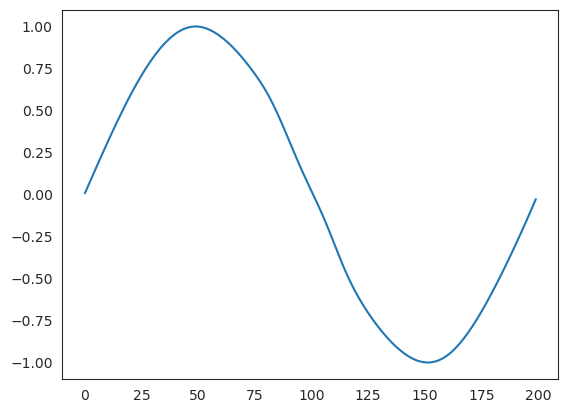

In [60]:
plt.plot(y_pred[:,0])
plt.show()

In [61]:
y_pred[:,-1].shape

torch.Size([200])

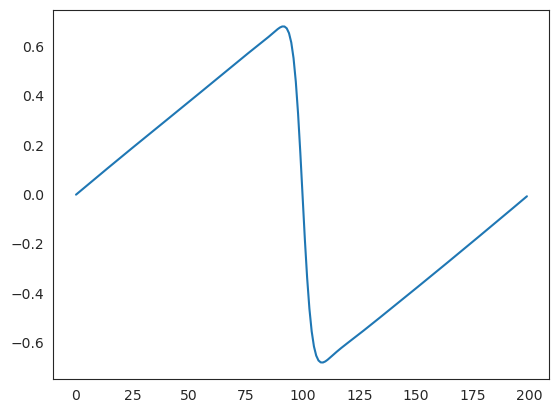

In [62]:
plt.plot(y_pred[:,-1])
plt.show()

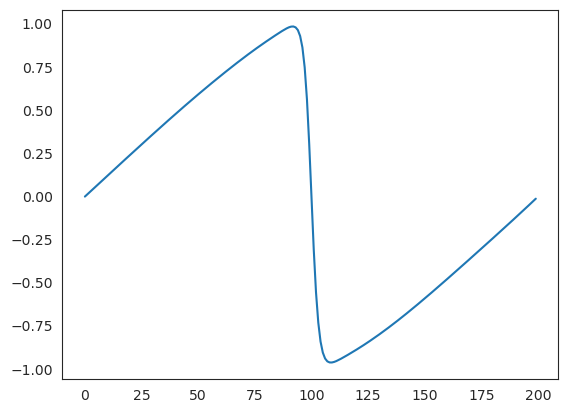

In [63]:
plt.plot(y_pred[:,50])
plt.show()

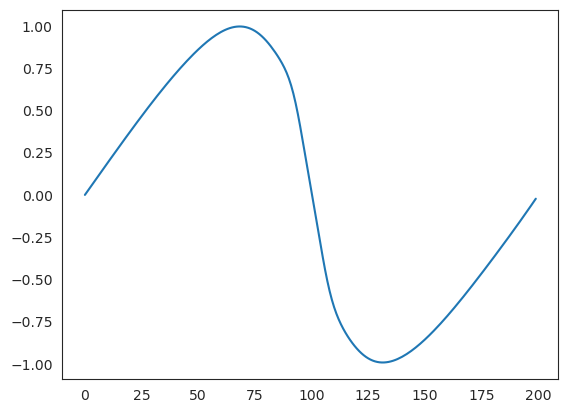

In [64]:
plt.plot(y_pred[:,20])
plt.show()

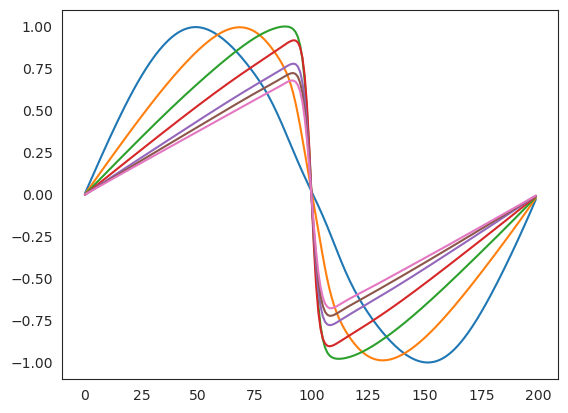

In [65]:
# for i in range(100):
#     plt.plot(y_pred[:,i])
#     i += 50
# #end-for
# plt.show()


plt.plot(y_pred[:,0])
plt.plot(y_pred[:,20])
plt.plot(y_pred[:,40])
plt.plot(y_pred[:,60])
plt.plot(y_pred[:,80])
plt.plot(y_pred[:,90])
plt.plot(y_pred[:,-1])
#end-for
plt.show()

### ignore (test cell):

In [66]:
# x = torch.tensor([1, 2, 3])
# # .requires_grad_(True)
# print(x)

# # Method-1: Requires Grad – outside tensor
# x = torch.tensor([1, 2, 3], dtype=float).requires_grad_(True)
# print(x)

# # Method-2: Requires Grad – inside tensor
# x = torch.tensor([1, 2, 3], dtype=float, requires_grad=True)
# print(x)

# # Method-3: Requires Grad – next-line
# x = torch.tensor([1, 2, 3], dtype=float)
# x.requires_grad = True
# print(x)

# # Note: However, the data type should be float (i.e., "dtype=float"); otherwise, gradient does not work.

In [28]:
# help(torch.optim.LBFGS)

In [176]:
# np.finfo(float)

In [176]:
# print(-torch.sin(torch.tensor(np.pi)*ic[:,0]))
# print(-torch.sin(torch.tensor(np.pi)*-1))
# print(-torch.sin(torch.tensor(np.pi)*1))

# x = torch.tensor([1, 2, 3], dtype=float)
# try:
#     x = x.to(device='cuda')
# except:
#     x = x.to(device='cpu')
# print(x)

# help(x.to)

In [192]:
# # h = 0.1
# # x_test = torch.arange(start=-1, end=1+h, step=h)
# # print(x_test)

# # t_test = torch.arange(start=0, end=1+h, step=h)
# # print(t_test)

# x = torch.tensor([1, 2, 3])
# y = torch.tensor([4, 5, 6])

# v = torch.meshgrid(x, y)
# print(v)

# v = torch.meshgrid(y, x)
# print(v)

In [193]:
# x = torch.arange(1, 3+1, 1)
# y = torch.arange(4, 6, 1)
# xx, yy = torch.meshgrid(x=y, y=x, indexing='ij')
# # z = np.sin(xx**2 + yy**2) / (xx**2 + yy**2)
# print(xx.shape)
# print(xx)
# print(yy.shape)
# print(yy)

In [194]:
# help(torch.meshgrid)

In [195]:
# x = np.arange(-5, 5+1, 1)
# y = np.arange(-5, 5+1, 1)
# xx, yy = np.meshgrid(x, y)

# print(x)
# print(xx)

# print(y)
# print(yy)
# # z = np.sin(xx**2 + yy**2) / (xx**2 + yy**2)
# # h = plt.contourf(x,y,z)
# # plt.show()

In [196]:
# help(torch.arange)

In [197]:
# help(np.arange)

In [166]:
# x[0]

In [167]:
# torch.set_printoptions(sci_mode=False, precision=3)
# y_bc1 = [-torch.sin(torch.tensor(np.pi)*x[0]) for _ in range(len(bc1))]
# print(y_bc1)

In [169]:
# np.set_printoptions(suppress=True)
# np.array([.000000035])

# torch.set_printoptions(sci_mode=False, precision=4)
# torch.tensor([0.35])

In [171]:
# help(torch.set_printoptions)

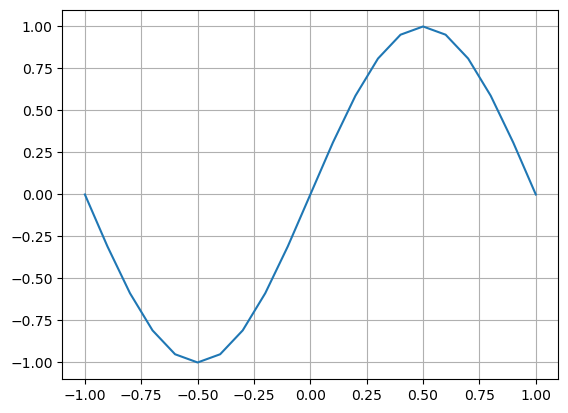

In [103]:
# plt.plot(ic[:,0], y_ic)
# plt.grid()
# plt.show()

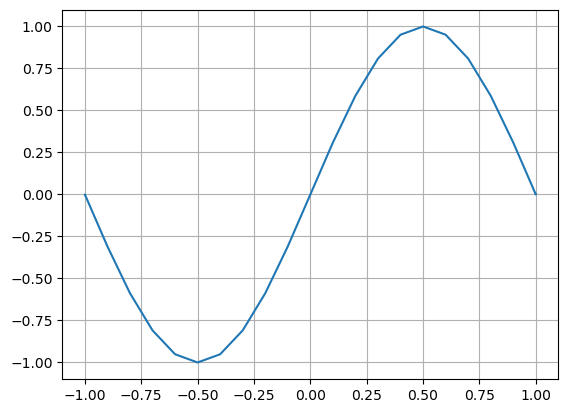

In [112]:
# plt.plot(X_train[:,0], y_train)
# plt.grid()
# plt.show()

In [50]:
# # tensor(-1) --> tensor([-1])
# V = torch.tensor([1, 2, 3, 4, 5])
# v = V[0]
# print(v)

# for i in range(10):
#     v = torch.unsqueeze(v, dim=0)
#     print(v)
#     print(v.shape)
# #end-for

In [59]:
# x = torch.tensor([1, 2, 3])
# y = torch.tensor([4, 5, 6])
# z = torch.tensor([7, 8, 9])

# v = torch.vstack((x, y, z))
# print(v)

tensor([[1, 2, 3],
        [4, 5, 6],
        [7, 8, 9]])


In [179]:
# help(torch.vstack)

In [177]:
# torch.tensor(np.pi)*3

In [12]:
# x = torch.randn(size=(2, 3))
# print(x)
# help(torch.cat)

In [178]:
# # a = torch.tensor([1])
# # print(a[0])
# # b = torch.tensor([4, 5])
# # # torch.cartesian_prod(a, b)

# h = 0.1
# x_test = torch.arange(start=-1, end=1+h, step=h)
# print(x_test)

# t_test = torch.arange(start=0, end=1+h, step=h)
# print(t_test)

# v = torch.cartesian_prod(torch.unsqueeze(x_test[0], dim=0), t_test)
# # print(v)
# # print(v.shape)
# print(v)
# # torch.unsqueeze(x_test[0], dim=0)

In [52]:
# help(torch.unsqueeze)

In [51]:
# help(torch.cartesian_prod)

In [47]:
# import torch

# x = torch.tensor([[1, 2, 3], [4, 5, 6]])

# y = torch.tensor([[1, 2], [3, 4], [5, 6]])

# # matrix multiplication of x and y
# z = torch.matmul(x, y)
# print(z)

# z = np.dot(x, y)
# print(z)